In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

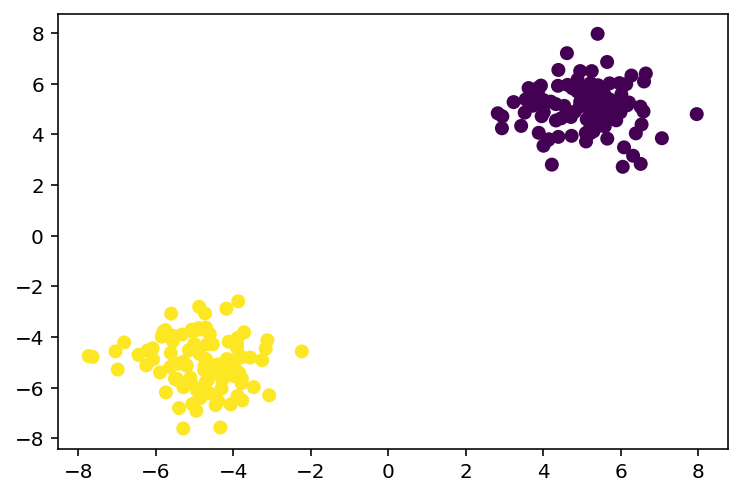

In [3]:
X = np.concatenate([
        np.array([5,5]) + np.random.randn(100, 2),
        -np.array([5,5]) + np.random.randn(100, 2),
    ])
y = np.array([0]*100 + [1]*100)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

Alternatively, you may use `sklearn.datasets.make_blobs`

In [6]:
from sklearn.svm import SVC ## support vector classifier
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

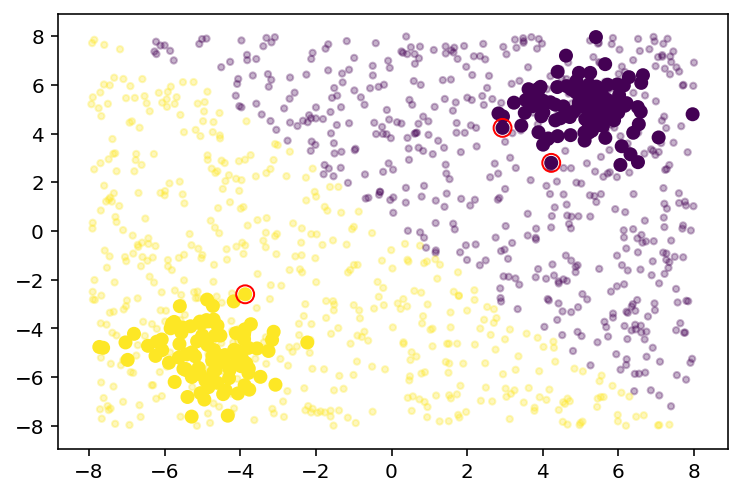

In [15]:
X_test = np.random.rand(1000, 2) * 16 - 8
y_model = model.predict(X_test)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_model, cmap='viridis', 
            s=10, alpha=0.3)

sv = model.support_vectors_
plt.scatter(sv[:,0], sv[:,1], 
            edgecolors='red', facecolors='none',
            s=80
           )

In [12]:
model.coef_

array([[-0.15464762, -0.1386911 ]])

In [13]:
sv = model.support_vectors_

array([[ 2.93521466,  4.23373785],
       [ 4.22289075,  2.79780008],
       [-3.87174013, -2.59669771]])

In [18]:
def make_ring(radius=1, samples=100):
    t = np.linspace(0, 6.28, samples)
    X = np.zeros((samples, 2))
    X[:,0] = radius * np.cos(t)
    X[:,1] = radius * np.sin(t)
    return X

def make_noise(samples=100):
    return np.random.randn(samples,2)
    

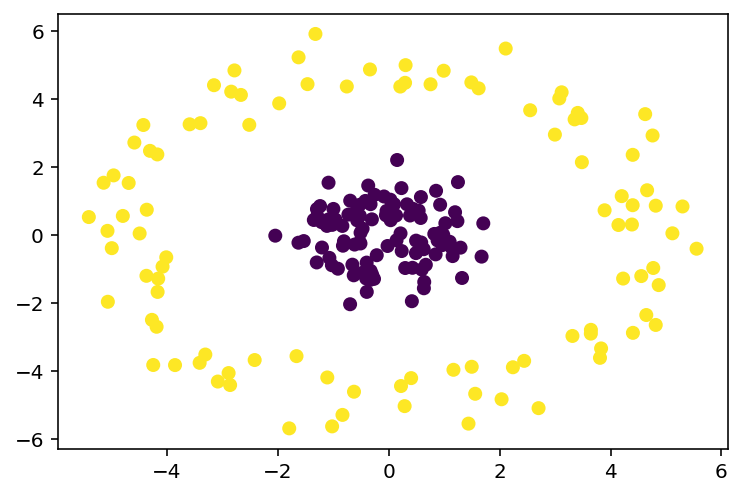

In [20]:
X = np.concatenate([
        make_ring(radius=1) + 0.5*make_noise(),
        make_ring(radius=5) + 0.5*make_noise(),
    ])
y = np.array([0]*100 + [1]*100)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

/projects/17d9912b-1105-4c79-ad9b-b38a4f5c1fff/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


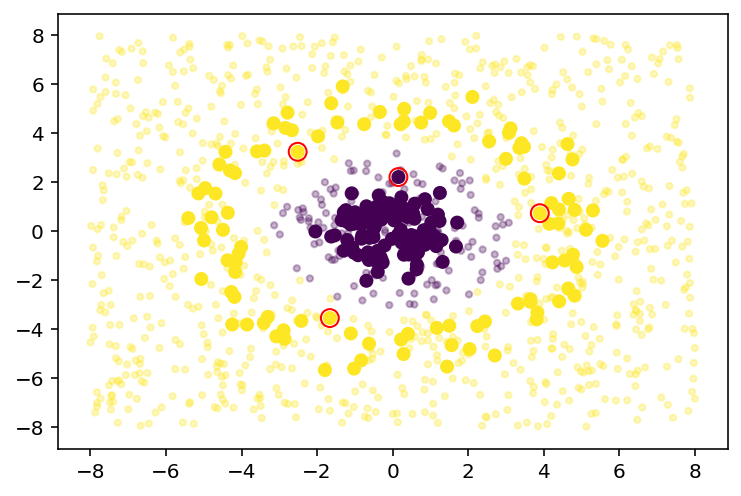

In [22]:
model = SVC(kernel='poly', degree=2) ### or 'rbf' kernel
model.fit(X, y)

X_test = np.random.rand(1000, 2) * 16 - 8
y_model = model.predict(X_test)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_model, cmap='viridis', 
            s=10, alpha=0.3)

sv = model.support_vectors_
plt.scatter(sv[:,0], sv[:,1], 
            edgecolors='red', facecolors='none',
            s=80
           )

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier

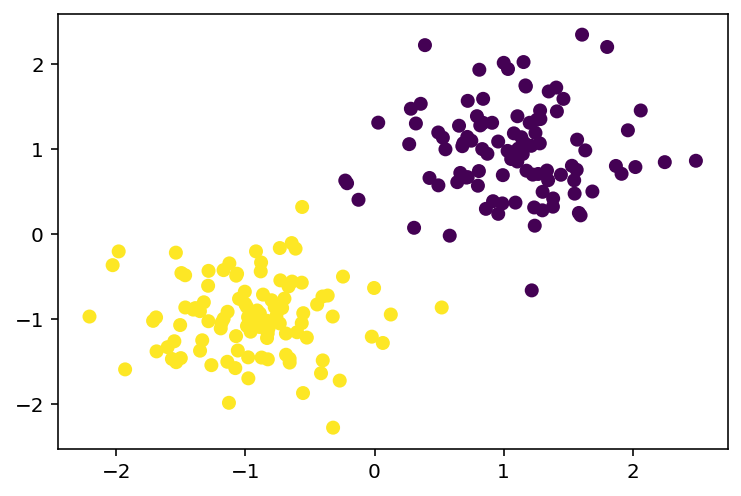

In [6]:
X = np.concatenate([
        np.array([1,1]) + 0.5*np.random.randn(100, 2),
        -np.array([1,1]) + 0.5*np.random.randn(100, 2),
    ])
y = np.array([0]*100 + [1]*100)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [8]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

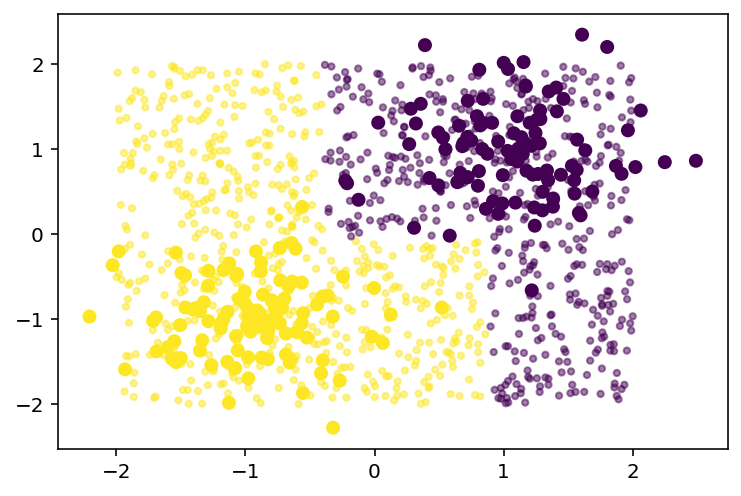

In [11]:
X_test = np.random.rand(1000, 2) * 4 - 2
y_model = model.predict(X_test)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_model, cmap='viridis',
            s=10, alpha=0.5
           )

In [13]:
t = model.tree_
print(t.children_left)
print(t.children_right)
print(t.feature)
print(t.threshold)

[ 1  2 -1 -1  5 -1 -1]
[ 4  3 -1 -1  6 -1 -1]
[ 1  0 -2 -2  0 -2 -2]
[-0.06140644  0.86910376 -2.         -2.         -0.39343282 -2.
 -2.        ]


In [14]:
from sklearn.ensemble import BaggingClassifier

In [16]:
model = BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=20, 
                          max_samples=0.5
                         )
### e.g., we had 200 points
### max_samples=0.5 means each time we will randomly chose 200*0.5=100 samples
### Each time, use the 100 samples to apply DT algorithm
### Do this 20 times (n_estimators)
model.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

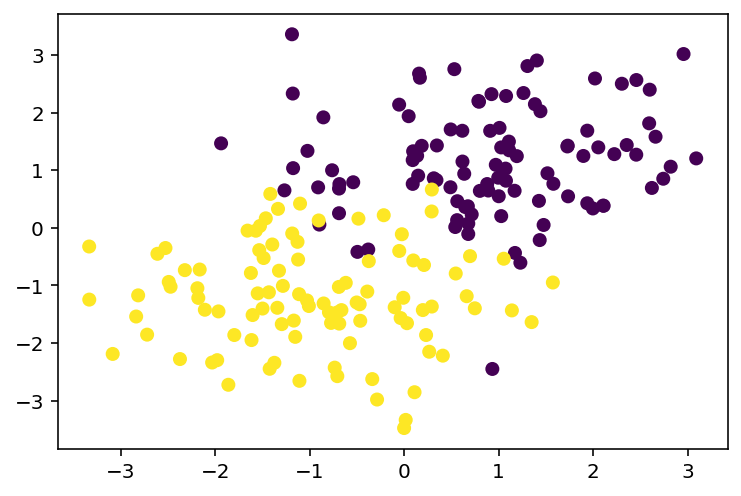

In [17]:
X = np.concatenate([
        np.array([1,1]) + np.random.randn(100, 2),
        -np.array([1,1]) + np.random.randn(100, 2),
    ])
y = np.array([0]*100 + [1]*100)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

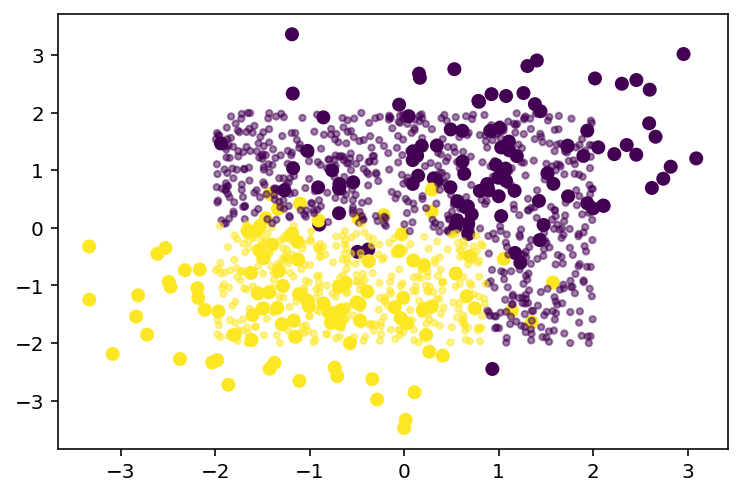

In [18]:
X_test = np.random.rand(1000, 2) * 4 - 2
y_model = model.predict(X_test)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_model, cmap='viridis',
            s=10, alpha=0.5
           )

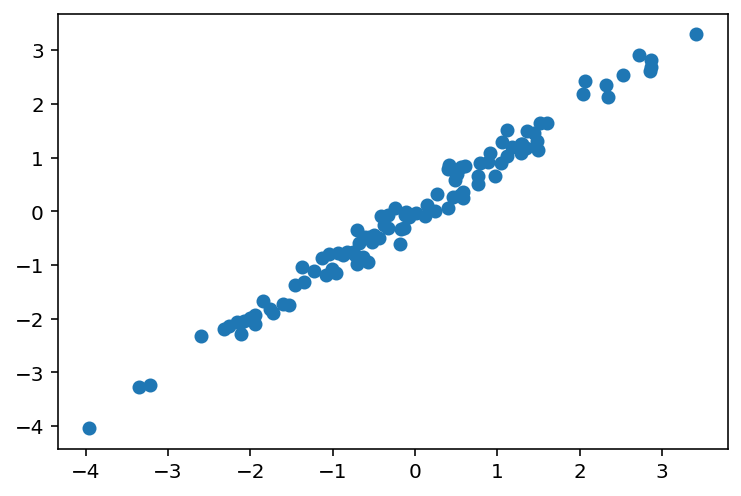

In [23]:
var_matrix = np.array([
        [2.01, 1.99],
        [1.99, 2.01]
    ])
mean = np.array([0,0])
X = np.random.multivariate_normal(mean, var_matrix, 100)
plt.scatter(X[:,0], X[:,1])

In [26]:
from sklearn.decomposition import PCA
redu = PCA(n_components=1)
X_new = redu.fit_transform(X)

In [31]:
print(X.shape)
print(X_new.shape)

(100, 2)
(100, 1)


In [32]:
X_2d = redu.inverse_transform(X_new)

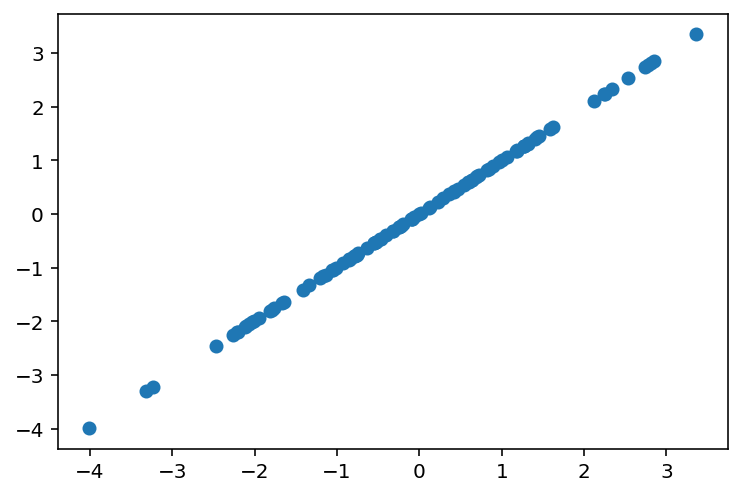

In [33]:
plt.scatter(X_2d[:,0], X_2d[:,1])

In [34]:
from sklearn import datasets

(150, 4)
(150,)


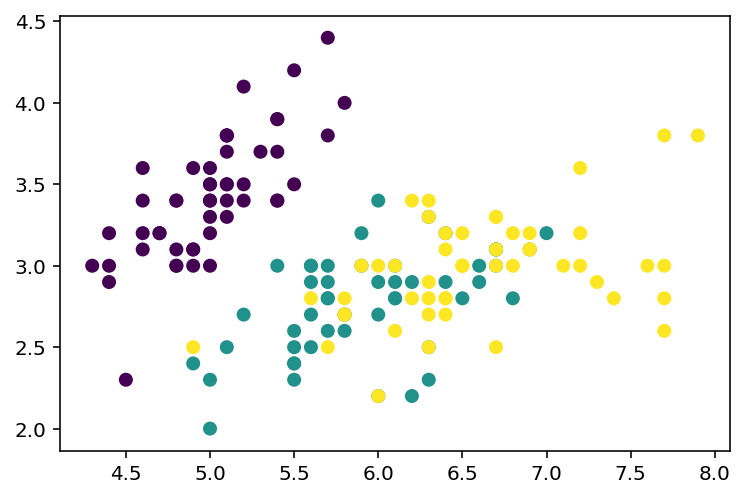

In [35]:
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
print(X.shape)
print(y.shape)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

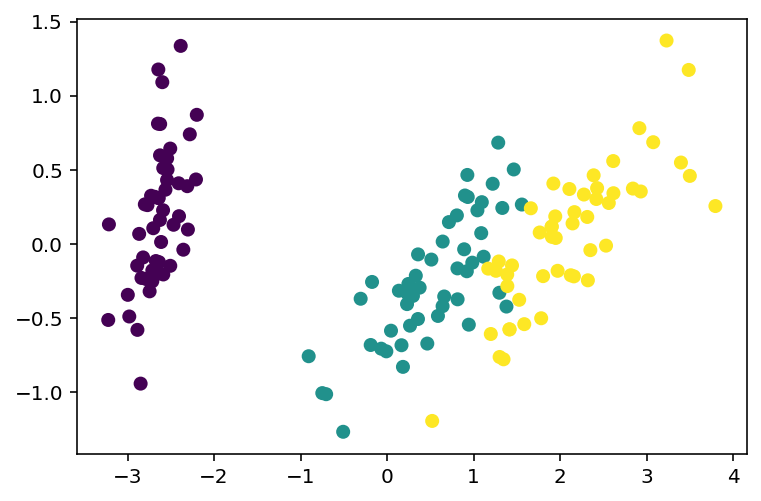

In [38]:
redu = PCA(2)
X_new = redu.fit_transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c=y, cmap='viridis')

In [40]:
digits = datasets.load_digits()
X = digits['data']
y = digits['target']
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


(8, 8)
1


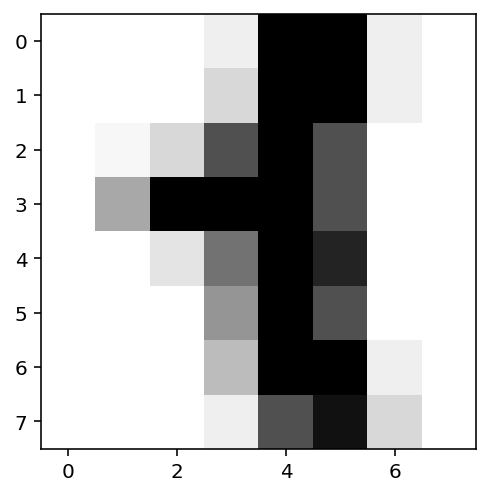

In [46]:
k = 21
img = digits['images'][k]
print(img.shape)
plt.imshow(img, cmap='Greys')
print(y[k])

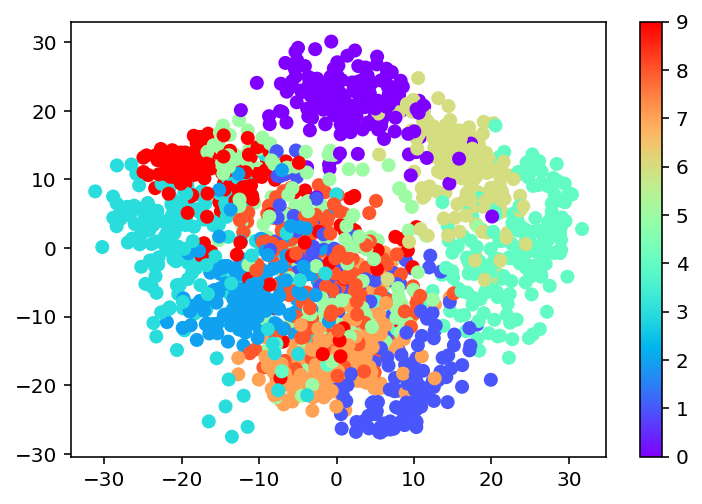

In [48]:
redu = PCA(2)
X_new = redu.fit_transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c=y, cmap='rainbow')
plt.colorbar()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

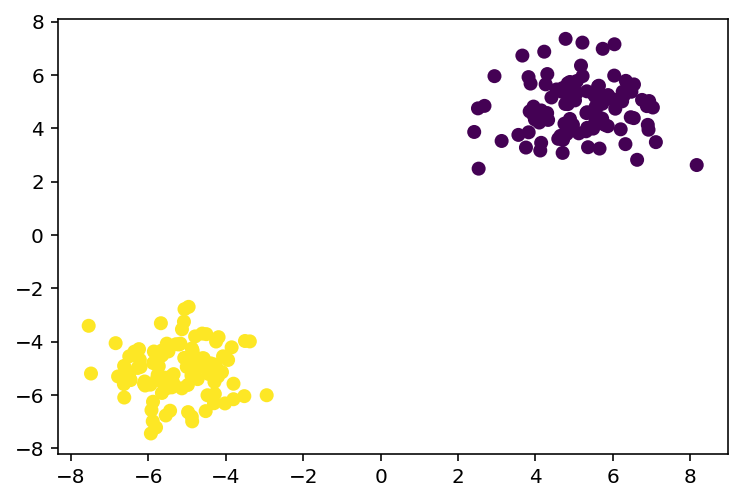

In [4]:
X = np.concatenate([
        np.array([5,5]) + np.random.randn(100, 2),
        -np.array([5,5]) + np.random.randn(100, 2)
    ])
y = np.array([0]*100 + [1]*100)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [6]:
from sklearn.svm import SVC ### support vector classifier
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

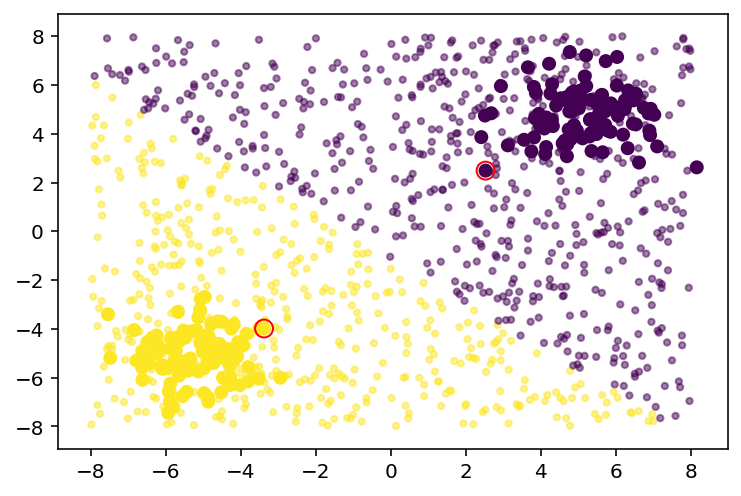

In [15]:
X_test = np.random.rand(1000, 2) * 16 - 8
y_model = model.predict(X_test)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_model, cmap='viridis',
            alpha=0.5, s=10 ### transparency, size
           )

sv = model.support_vectors_
plt.scatter(sv[:,0], sv[:,1], 
            edgecolors='red', facecolors='none', 
            s=80)

In [11]:
model.coef_

array([[-0.15375342, -0.16849408]])

In [12]:
model.support_vectors_

array([[ 2.53144372,  2.48926984],
       [-3.37869761, -3.98748923]])

In [19]:
def make_ring(radius=1, samples=100):
    t = np.linspace(0, 6.28, samples)
    X = np.zeros((samples, 2))
    X[:,0] = radius * np.cos(t)
    X[:,1] = radius * np.sin(t)
    return X

def make_noise(samples=100):
    return np.random.randn(samples, 2)

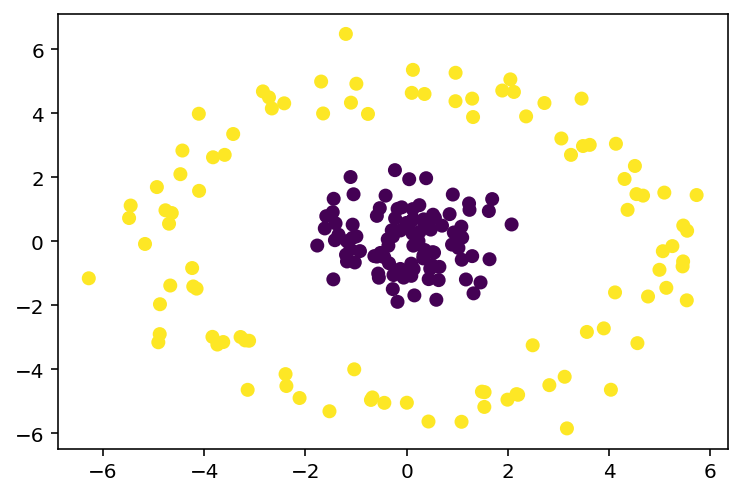

In [22]:
X = np.concatenate([
        make_ring(1) + 0.5*make_noise(),
        make_ring(5) + 0.5*make_noise(),
    ])
y = np.array([0]*100 + [1]*100)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

/projects/17d9912b-1105-4c79-ad9b-b38a4f5c1fff/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


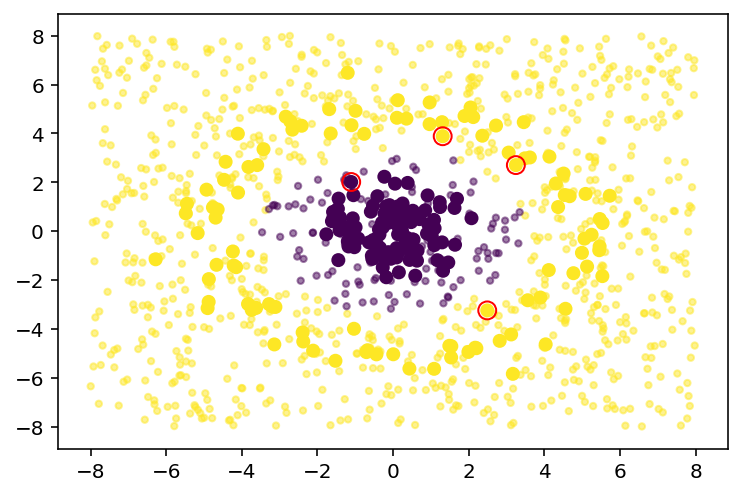

In [24]:
from sklearn.svm import SVC ### support vector classifier
model = SVC(kernel='poly', degree=2)
model.fit(X, y)

X_test = np.random.rand(1000, 2) * 16 - 8
y_model = model.predict(X_test)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_model, cmap='viridis',
            alpha=0.5, s=10 ### transparency, size
           )

sv = model.support_vectors_
plt.scatter(sv[:,0], sv[:,1], 
            edgecolors='red', facecolors='none', 
            s=80)

## Decision tree

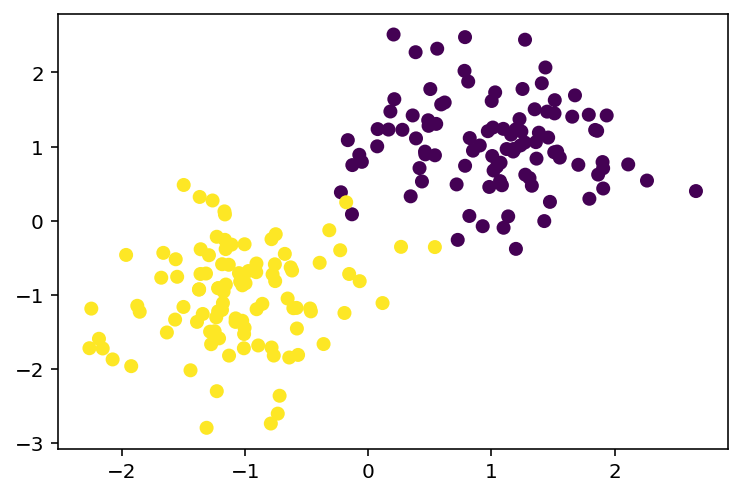

In [39]:
X = np.concatenate([
        np.array([1,1]) + 0.6*np.random.randn(100, 2),
        -np.array([1,1]) + 0.6*np.random.randn(100, 2)
    ])
y = np.array([0]*100 + [1]*100)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [40]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

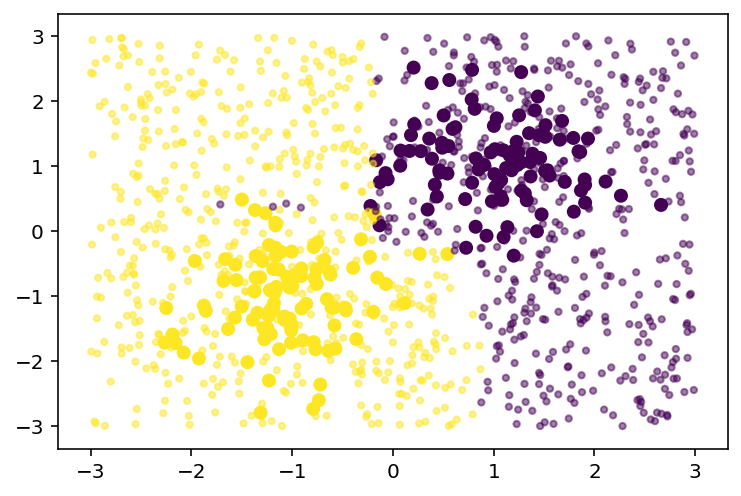

In [41]:
X_test = np.random.rand(1000, 2) * 6 - 3
y_model = model.predict(X_test)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_model, cmap='viridis',
            alpha=0.5, s=10 ### transparency, size
           )

In [44]:
t = model.tree_
print(t.children_left)
print(t.children_right)
print(t.feature)
print(t.threshold)

[ 1  2 -1  4 -1 -1  7  8 -1 -1 -1]
[ 6  3 -1  5 -1 -1 10  9 -1 -1 -1]
[ 0  1 -2  1 -2 -2  1  0 -2 -2 -2]
[-0.17302125  0.35186839 -2.          0.43260495 -2.         -2.
 -0.30546403  0.86964318 -2.         -2.         -2.        ]


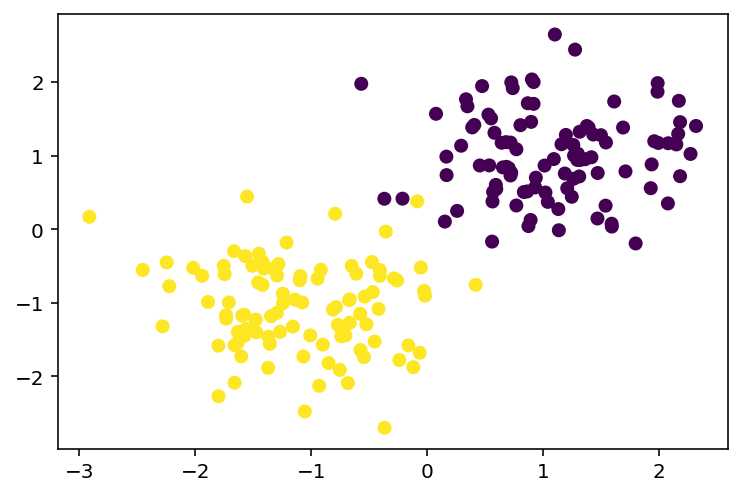

In [47]:
X = np.concatenate([
        np.array([1,1]) + 0.6*np.random.randn(100, 2),
        -np.array([1,1]) + 0.6*np.random.randn(100, 2)
    ])
y = np.array([0]*100 + [1]*100)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')

In [48]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(DecisionTreeClassifier(),
                          n_estimators=20,
                          max_samples=0.5
                         )
model.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

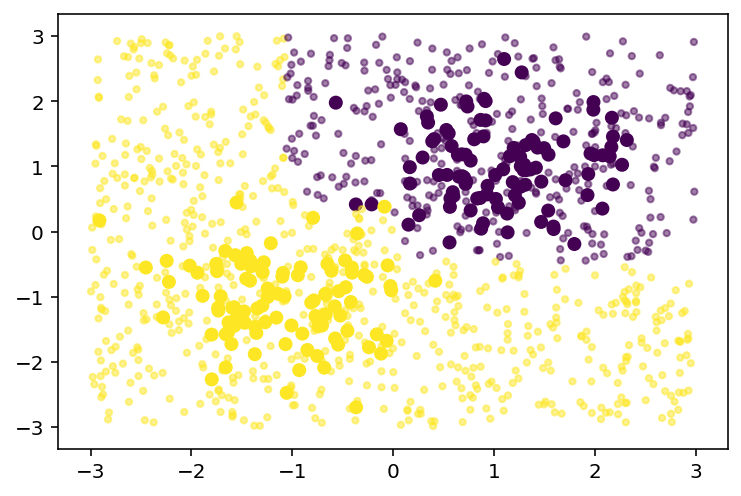

In [49]:
X_test = np.random.rand(1000, 2) * 6 - 3
y_model = model.predict(X_test)

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.scatter(X_test[:,0], X_test[:,1], 
            c=y_model, cmap='viridis',
            alpha=0.5, s=10 ### transparency, size
           )